In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dataset_train=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\train.csv")
dataset_train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [48]:
del dataset_train[dataset_train.columns[0]]
dataset_train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [49]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [50]:
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(dataset_train.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    dataset_train.loc[dataset_train[i]<Innerfence, i] = np.nan
    dataset_train.loc[dataset_train[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.1725005
Upperfence= 1.1541675
IQR =0.331667
atemp
Innerfence= -0.11368349999999999
Upperfence= 1.0480165000000001
IQR =0.290425
hum
Innerfence= 0.2327079999999998
Upperfence= 1.047708
IQR =0.2037500000000001
windspeed
Innerfence= -0.013655000000000056
Upperfence= 0.384313
IQR =0.09949200000000002
cnt
Innerfence= -1549.0
Upperfence= 8267.0
IQR =2454.0


In [51]:
dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           2
windspeed     5
cnt           0
dtype: int64

In [52]:
dataset_train['hum'] = dataset_train['hum'].fillna(dataset_train['hum'].median())
dataset_train['windspeed'] = dataset_train['windspeed'].fillna(dataset_train['windspeed'].median())

In [53]:
dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

temp


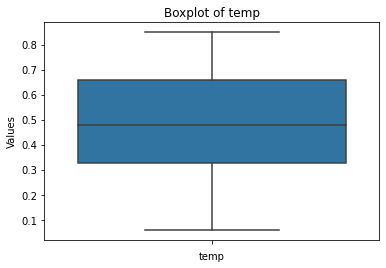

atemp


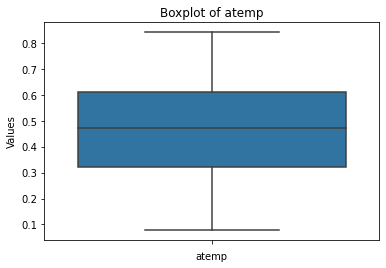

hum


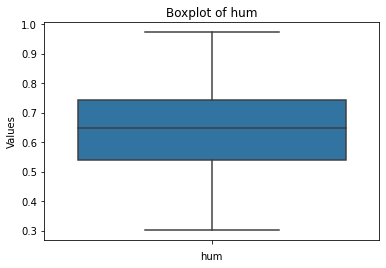

windspeed


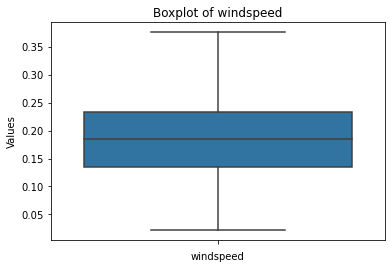

cnt


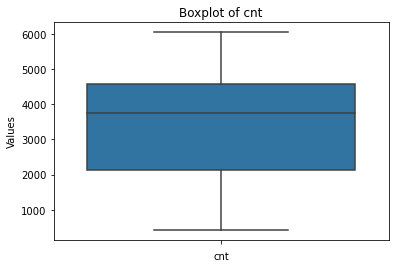

In [77]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = dataset_train[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

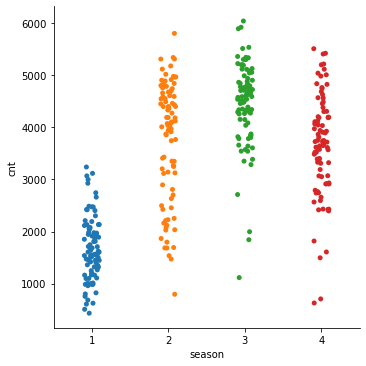

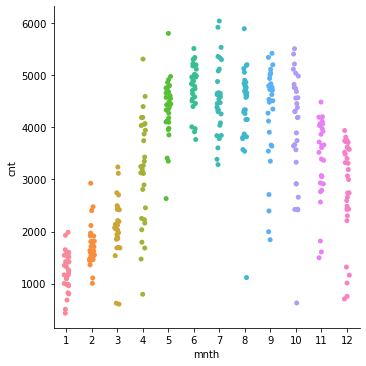

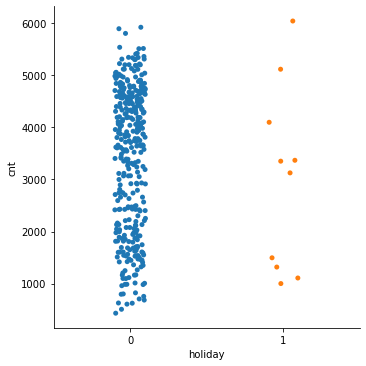

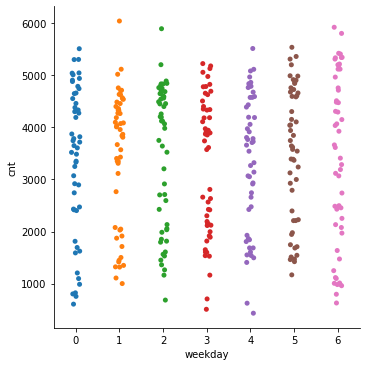

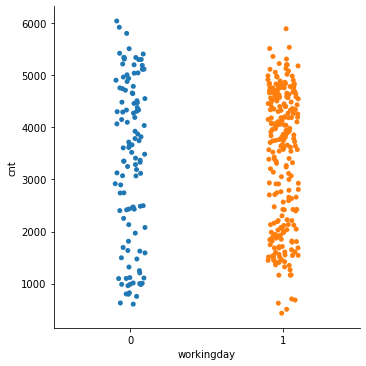

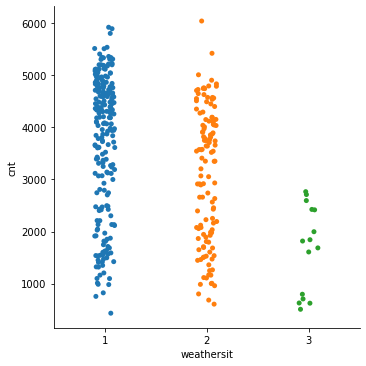

In [78]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=dataset_train)

temp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


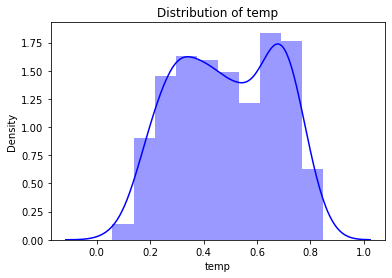

atemp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


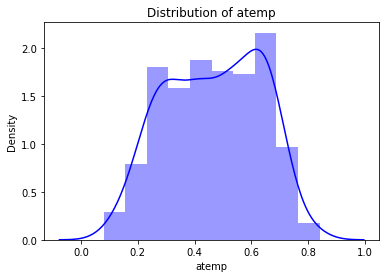

hum


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


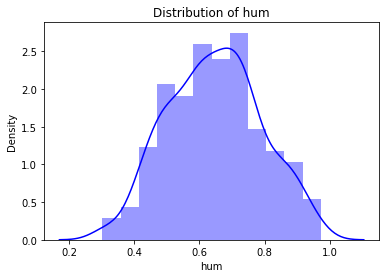

windspeed


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


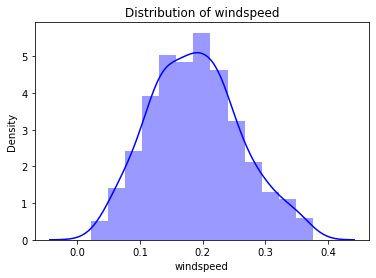

cnt


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


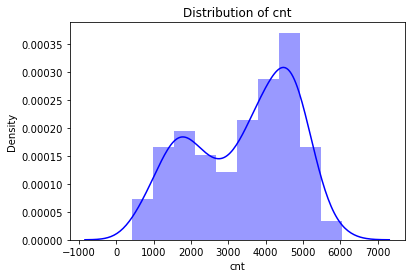

In [79]:
for i in numeric_var:
    print(i)
    sns.distplot(dataset_train[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

In [54]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [56]:
len(X_train)

328

In [57]:
len(y_train)

328

In [58]:
len(X_test)

37

In [59]:
len(y_test)

37

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [62]:
linear_regression=LinearRegression()
model=linear_regression.fit(X_train,y_train)
Y_pred=model.predict(X_test)

In [63]:
print("training score : ", linear_regression.score(X_train, y_train))

training score :  0.7578259289773663


In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("Testing score : ", score)

Testing score :  0.7341331959855988


In [65]:
dataset_test=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\test.csv")
dataset_test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [66]:
X2 = dataset_test.iloc[:, 1:].values

In [67]:
X2


array([[ 1.  ,  1.  ,  0.  , ...,  0.38,  0.69,  0.19],
       [ 1.  ,  1.  ,  1.  , ...,  0.25,  0.38,  0.33],
       [ 1.  ,  1.  ,  0.  , ...,  0.13,  0.44,  0.37],
       ...,
       [ 1.  , 12.  ,  0.  , ...,  0.24,  0.75,  0.12],
       [ 1.  , 12.  ,  0.  , ...,  0.23,  0.48,  0.35],
       [ 1.  , 12.  ,  0.  , ...,  0.22,  0.58,  0.15]])

X2

In [68]:
len(X2)

366

In [69]:
y2_pred = regressor.predict(X2)
np.set_printoptions(precision=2)

In [70]:
y2_pred

array([2365.17, 1626.01, 1274.76, 1032.77, 2323.91, 2569.62, 2780.  ,
       2405.35, 1480.95, 2253.59, 1555.59, 2016.94, 1847.89, 1815.03,
       1504.76, 1337.91, 1644.6 , 1914.16, 1788.26, 1522.65,  887.52,
        772.83, 1250.16, 2378.34, 2254.65, 2090.79, 1950.7 , 2343.22,
       2163.61, 2178.28, 2662.22, 3137.96, 2195.04, 2451.2 , 1577.11,
       1402.37, 2201.42, 2677.23, 1575.85, 2137.87, 1931.87,  559.59,
        931.42, 2061.51, 2022.83, 2568.08, 1948.46, 2457.3 , 2535.53,
       1444.23, 1772.86, 2158.94, 2645.08, 3038.42, 2102.13, 1866.56,
       2133.3 , 2451.74, 2678.52, 1820.4 , 3060.43, 2109.38, 2331.89,
       2079.63, 1942.75, 2136.07, 2484.17, 2864.36, 2017.48, 2321.75,
       2439.97, 3052.36, 3353.56, 3756.76, 3573.85, 2399.22, 2783.87,
       2368.35, 3304.85, 3408.39, 3229.63, 3787.72, 3646.9 , 2817.76,
       2334.64, 2971.16, 2987.73, 3385.62, 3436.08, 2644.26, 2469.  ,
       2546.03, 3046.65, 3756.25, 3901.39, 3427.26, 3121.69, 3388.19,
       3617.58, 3367

In [71]:
submission=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\sample_submission.csv")
submission.head()

,id,cnt
0,366,2324.704634
1,367,1825.998871
2,368,1246.661929
3,369,1067.359745
4,370,2349.727614


In [72]:
df=pd.DataFrame(submission)


In [73]:
df['cnt']=y2_pred

In [74]:
df

,id,cnt
0,366,2365.169085
1,367,1626.013170
2,368,1274.755561
3,369,1032.766702
4,370,2323.907952
...,...,...
361,727,1157.912783
362,728,1665.017569
363,729,1520.179921
364,730,1642.851268


In [75]:
print(df.to_string(index=False))

  id          cnt
 366  2365.169085
 367  1626.013170
 368  1274.755561
 369  1032.766702
 370  2323.907952
 371  2569.624339
 372  2779.996588
 373  2405.346470
 374  1480.948657
 375  2253.587170
 376  1555.590489
 377  2016.943075
 378  1847.894354
 379  1815.030761
 380  1504.755958
 381  1337.907201
 382  1644.598884
 383  1914.162893
 384  1788.258451
 385  1522.649465
 386   887.516182
 387   772.826533
 388  1250.156029
 389  2378.343921
 390  2254.653990
 391  2090.787103
 392  1950.697599
 393  2343.220011
 394  2163.607403
 395  2178.281341
 396  2662.215808
 397  3137.961423
 398  2195.039961
 399  2451.198416
 400  1577.106958
 401  1402.370233
 402  2201.415313
 403  2677.233576
 404  1575.850963
 405  2137.865522
 406  1931.873055
 407   559.592977
 408   931.417692
 409  2061.512375
 410  2022.826306
 411  2568.081298
 412  1948.462105
 413  2457.300568
 414  2535.525017
 415  1444.234893
 416  1772.862438
 417  2158.937701
 418  2645.082679
 419  3038.417579
 420  2102

In [76]:
df.to_csv('C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\linear_submission3.csv',index=False)